<a href="https://colab.research.google.com/github/wulanasyifaa/WineRed-Classification/blob/main/WineRed_Dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wulan Asyifa

Data Source: https://archive.ics.uci.edu/dataset/186/wine+quality

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# **Data Preparation**

In [ ]:
winered = pd.read_csv('/content/winequality-red.csv',sep = ";")
winered.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**X Variables (Explanatory/Independent Variables)**
* **Fixed acidity**, which refers to the non-volatile acids that contribute to the wine’s overall acidity.
* **Volatile acidity**, which is the amount of volatile acids that can negatively affect the wine’s aroma if too high.
* **Citric acid**, which is a natural acid that adds freshness and balance to the wine.
* **Residual sugar**, which is the amount of sugar remaining after the fermentation process.
* **Chlorides**, which represent the salt content in the wine that can influence its taste.
* **Free sulfur dioxide**, which acts as a preservative that protects the wine from oxidation and microbial growth.
* **Total sulfur dioxide**, which is the total amount of sulfur dioxide present, including both free and bound forms.
* **Density**, which indicates the wine’s mass per volume and is related to sugar and alcohol content.
* **pH**, which measures the acidity or basicity of the wine.
* **Sulphates**, which are used as preservatives and can contribute a bitter taste if excessive.
* **Alcohol**, which indicates the alcohol percentage in the wine and plays a key role in its overall quality.

**Y Variable (Response/Target Variable)**
* **Quality**, which is the quality score of the wine based on sensory evaluation, rated on a scale from 0 to 10.



In [ ]:
mean_quality = winered['quality'].mean()
print(f'Nilai Rata-rata Kualitas: {mean_quality}')
winered['class'] = np.where(winered['quality'] > mean_quality, 2, 1)
print(winered[['quality', 'class']].head())

Nilai Rata-rata Kualitas: 5.6360225140712945
   quality  class
0        5      1
1        5      1
2        5      1
3        6      2
4        5      1


Calculating the Average Quality and Creating a New Column

This section calculates the average wine quality and displays the result. The average value is then used as a threshold to categorize the data into classes. Based on the output, the average quality is 5.636. The quality is then grouped into the following classes:

Class "1": quality value < average

Class "2": quality value > average

The classification result is then stored in a new column called "class".

## Updating the WineRed Dataset by Removing the Quality Column

In [ ]:
X = winered.drop(['quality', 'class'], axis=1)
y = winered['class']
print(f'Jumlah sampel X: {X.shape[0]}, Jumlah sampel y: {y.shape[0]}')
winered = winered.drop(columns=['quality'])

Jumlah sampel X: 1599, Jumlah sampel y: 1599


In [ ]:
winered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  class                 1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The WineRed dataset contains 1,599 rows and 12 columns, with all columns consisting of numerical data types (float64 and int64).

# **Exploratory Data Analysis**

## Checking For Missing Value



<Axes: >

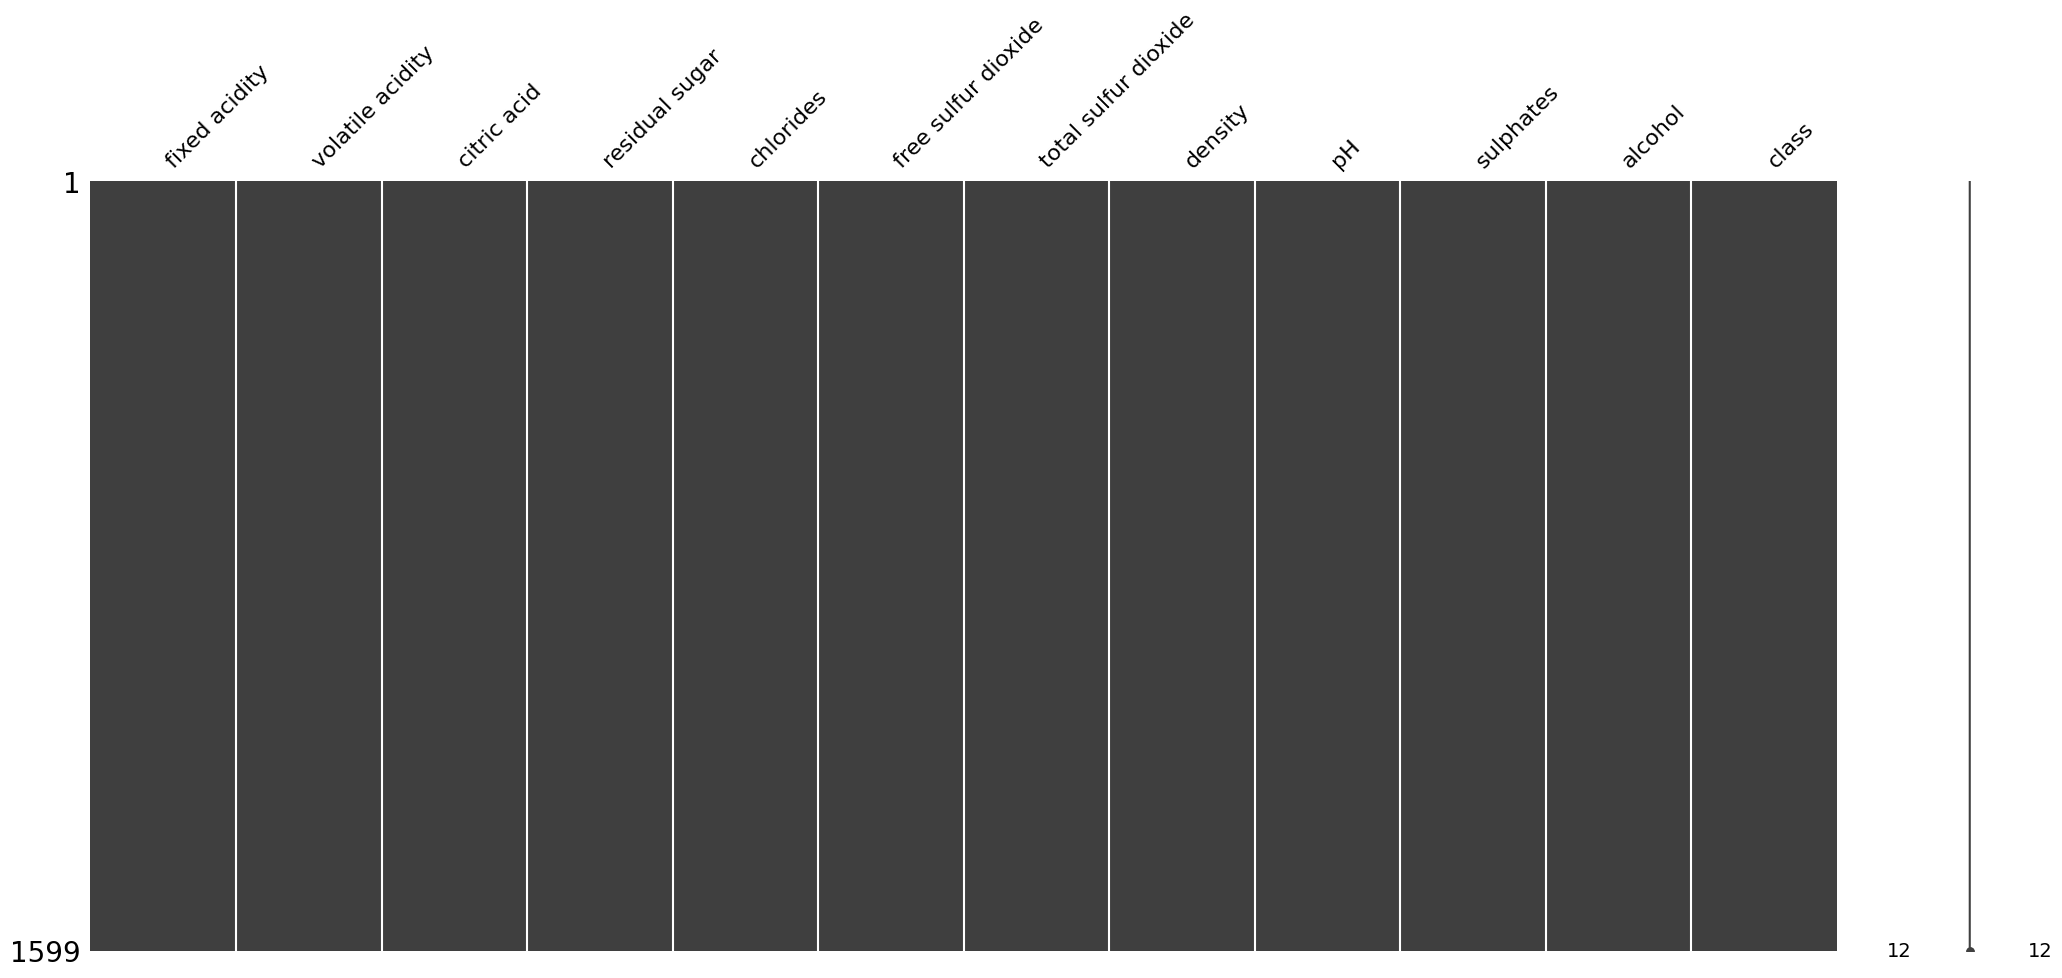

In [ ]:
msno.matrix(winered)

<Axes: >

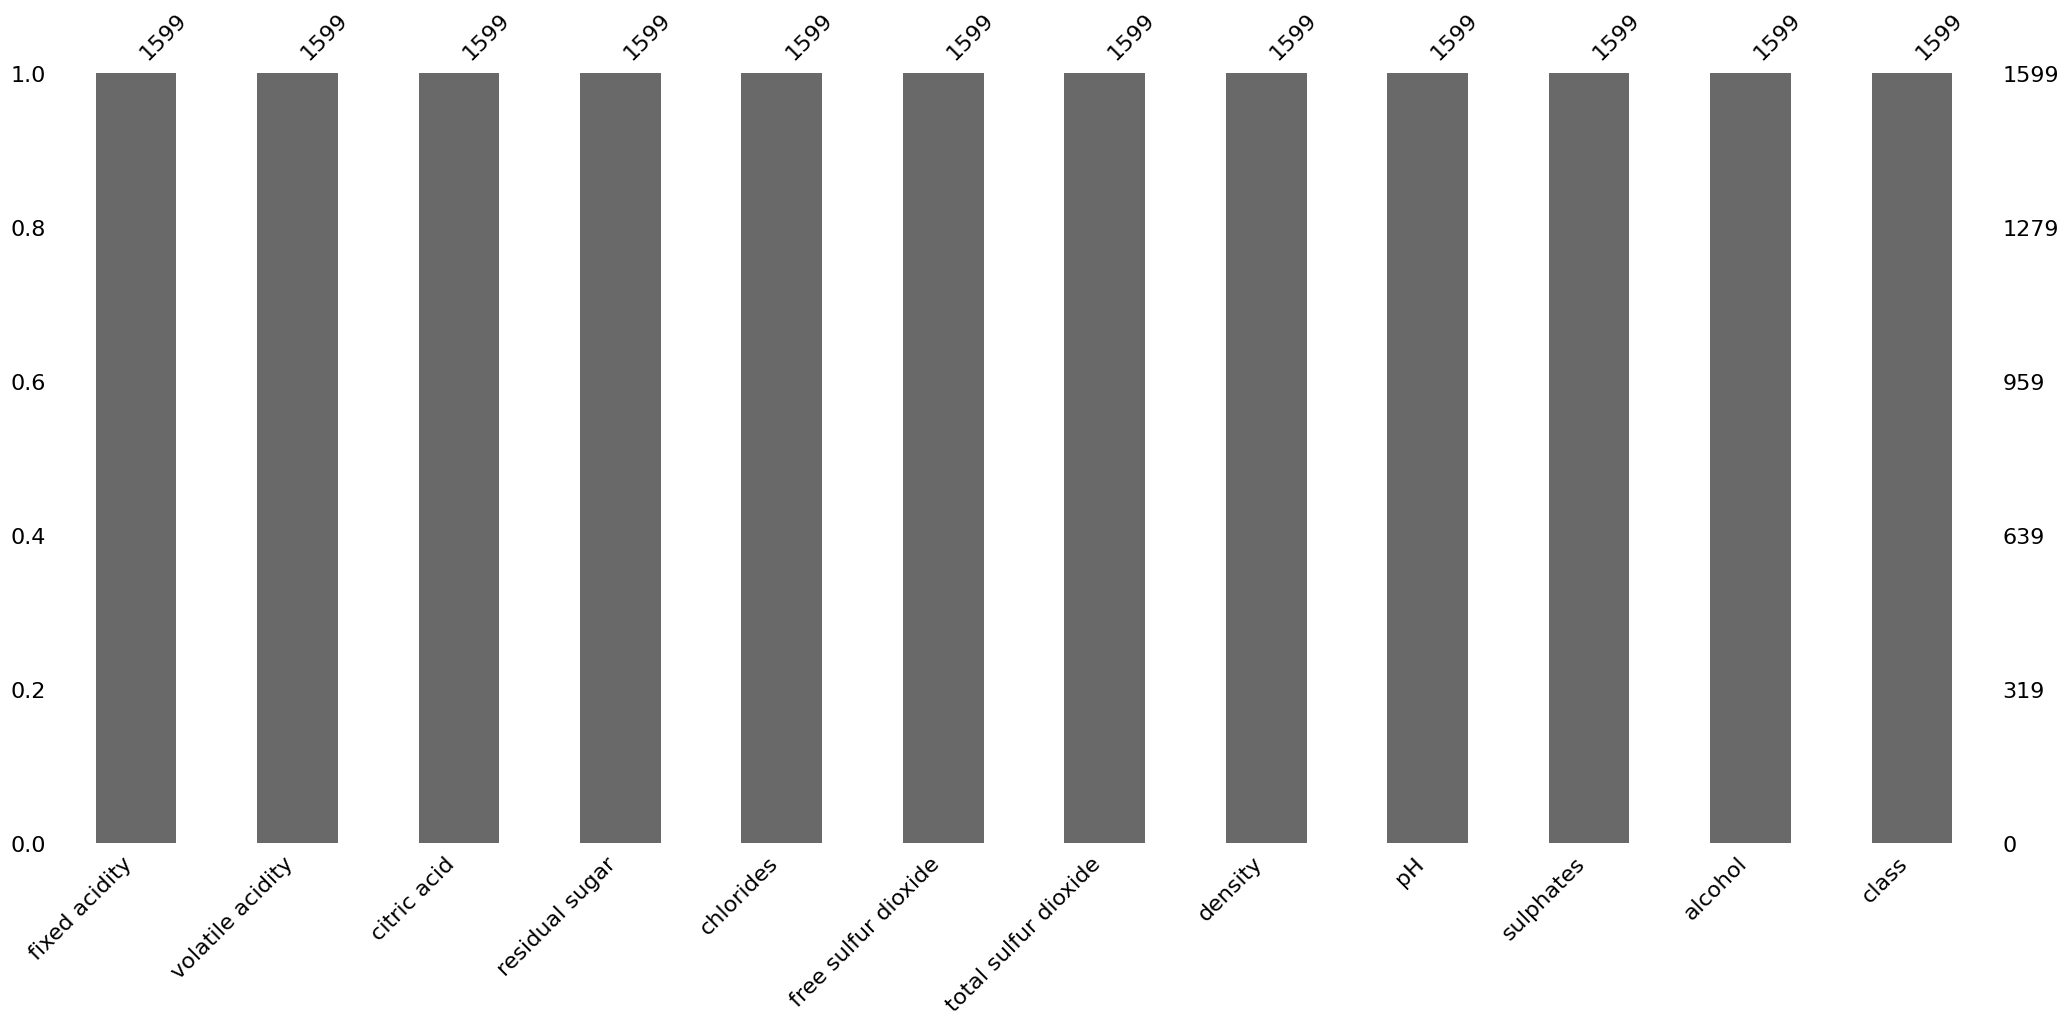

In [ ]:
msno.bar(winered)

"A check for missing values (missing or empty values) was performed, and the output results show that there are no missing values in the data, so no handling of missing values is required."

## Histogram Plot of Numerical Variables

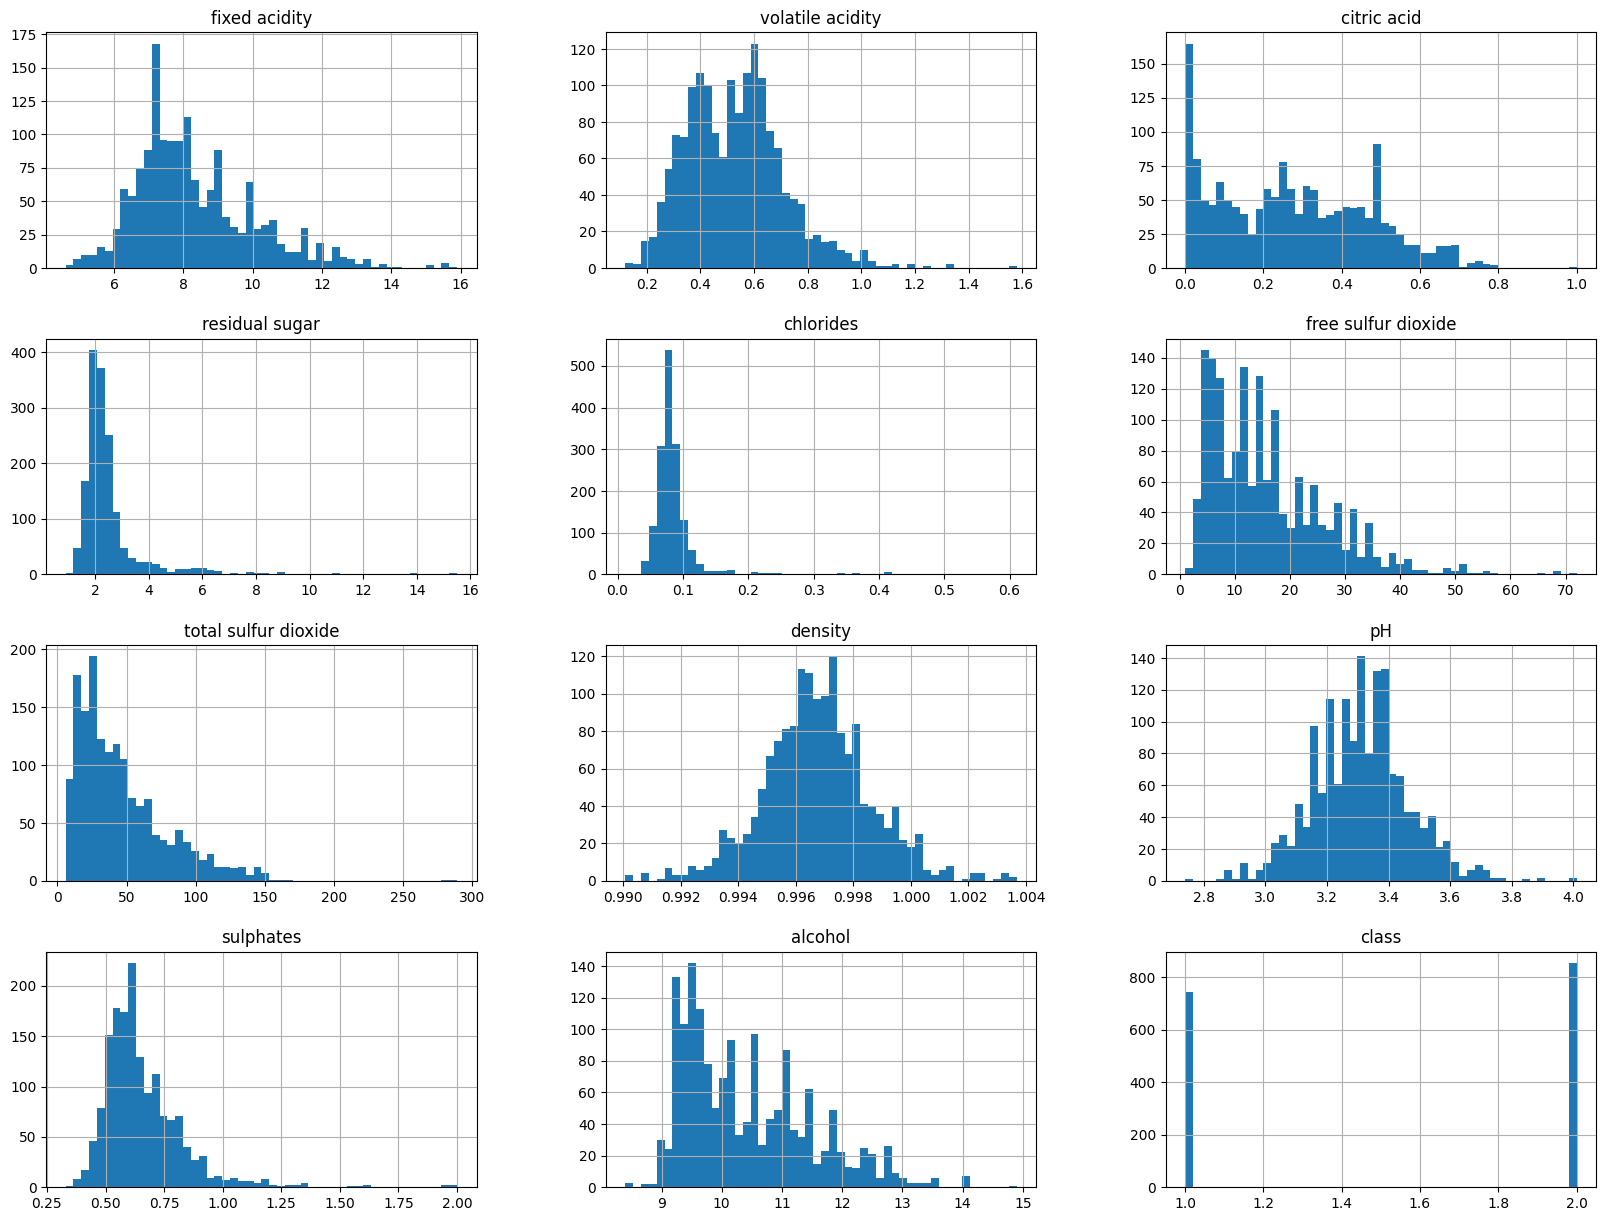

In [ ]:
winered.hist(bins=50, figsize=(20,15))
plt.show();

* Most chemical features are right-skewed, which may affect modeling (e.g., linear regression) and suggest the need for transformation (e.g., log scaling).

* Density and pH are more normally distributed, making them potentially more stable predictors.

* Class imbalance could affect model performance and might require handling techniques like resampling or weighted loss functions.

## Outlier Checking

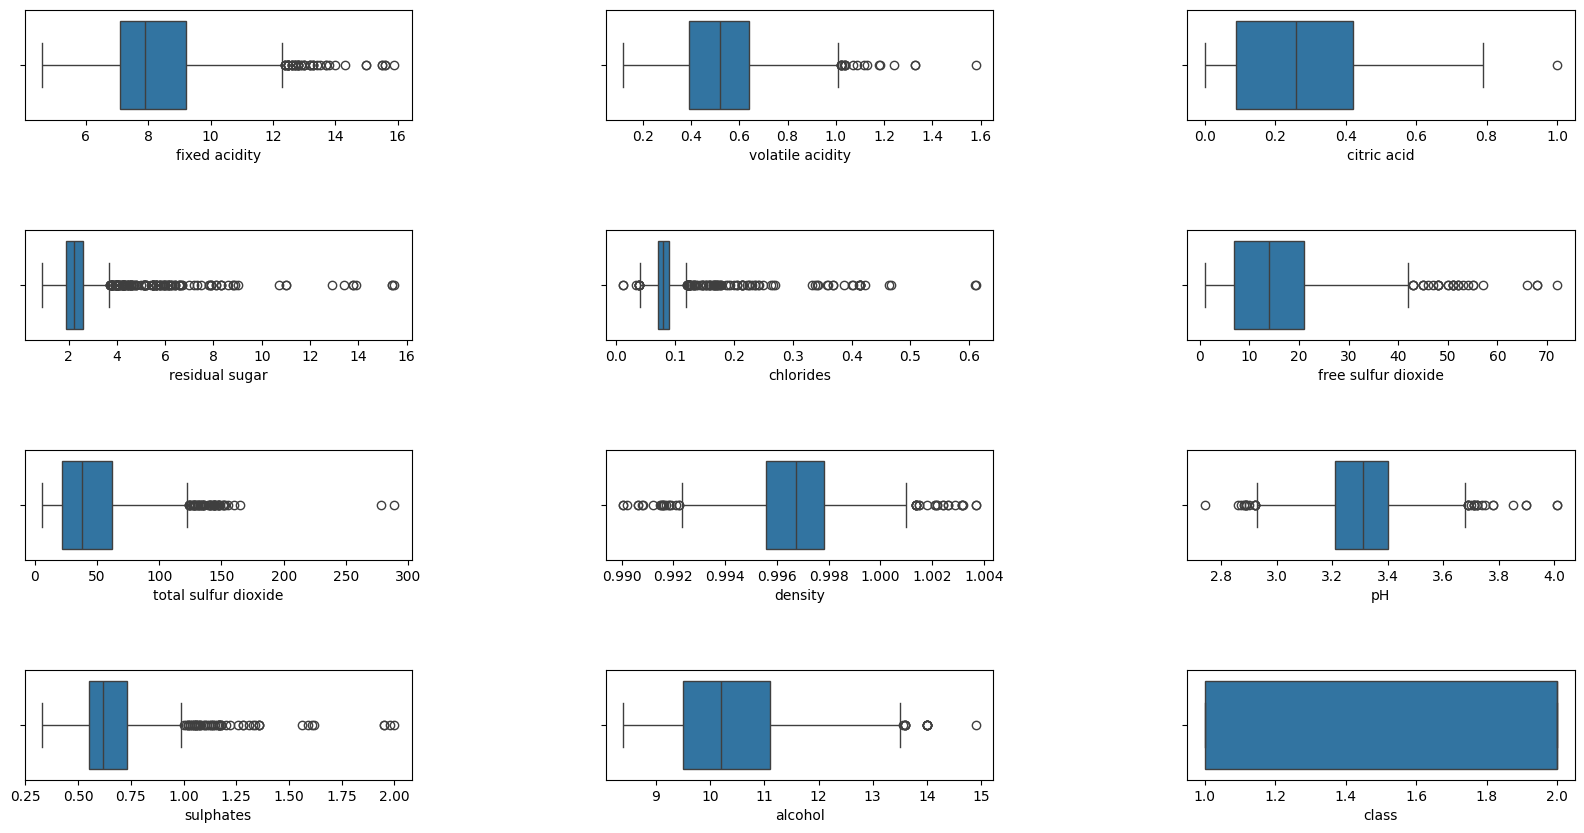

In [ ]:
#plot boxplot for each numerical variables
numerical = winered.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(4,3,figsize = (20,10))
fig.subplots_adjust(hspace=1, wspace=0.5)
row = 0
cols = 0

for item in numerical:
    if cols > 2:
        cols = 0
        row += 1
    ax = sns.boxplot(x=item,data=winered ,ax=axes[row, cols])
    ax.set_ylabel("")
    cols += 1

Based on the box plot visualizations, 11 variables exhibit indications of potential outliers. Variables such as fixed acidity, volatile acidity, citrid acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol show data points that lie outside the upper and lower bounds of the box plots. However, no specific outlier treatment was applied in this analysis.

## Multicollinierity Check

In [ ]:
# calculate VIF scores for each feature
X_vif = add_constant(X_train)

vif_winered = pd.DataFrame([vif(X_vif.values, i)
               for i in range(X_vif.shape[1])],
              index=X_vif.columns).reset_index()
vif_winered.columns = ['feature','vif_score']
vif_winered = vif_winered.loc[vif_winered.feature!='const']
vif_winered

,feature,vif_score
1,fixed acidity,7.374554
2,volatile acidity,1.813146
3,citric acid,3.211154
4,residual sugar,1.731605
5,chlorides,1.519827
6,free sulfur dioxide,1.982913
7,total sulfur dioxide,2.203259
8,density,6.016488
9,pH,3.275199
10,sulphates,1.455527


A multicollinearity test was conducted on each variable. Based on the output, none of the variables exhibited a Variance Inflation Factor (VIF) value greater than 10. Therefore, no variable removal is necessary, as VIF values below 10 are generally considered acceptable. Among all variables, 'fixed acidity' had the highest VIF value of 7.374554.

# Heatmap

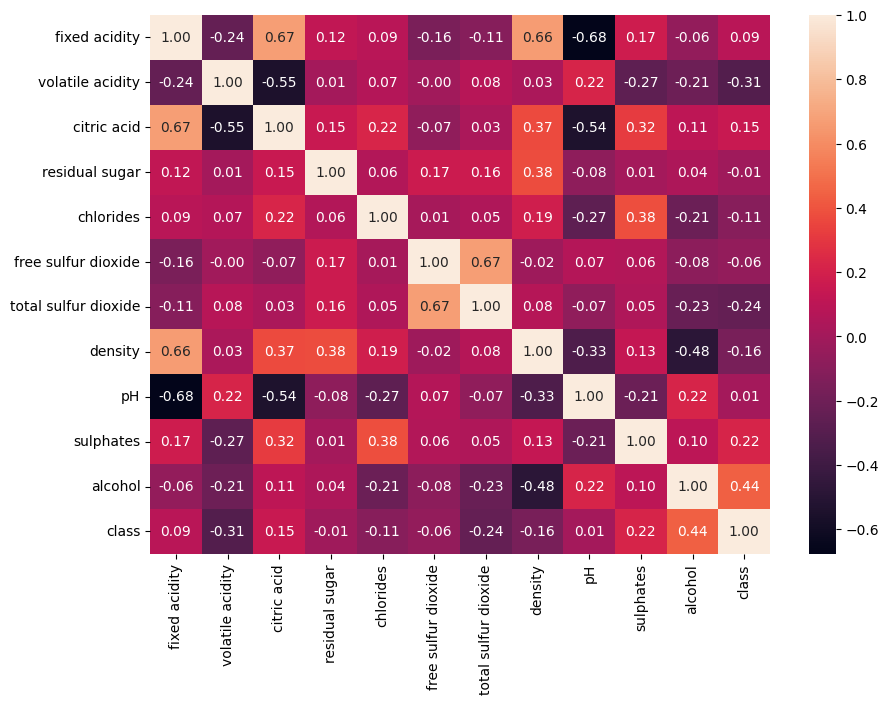

In [ ]:
# heatmap correlation
data_train = pd.concat([X_train, y_train], axis=1)
corr = data_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

The heatmap illustrates the correlations between variables within the winequality-red dataset. Correlation values range from -1 to 1, where:

* 1 indicates a perfect positive correlation (as one variable increases, the other also increases).
* -1 indicates a perfect negative correlation (as one variable increases, the other decreases).
* 0 indicates1 no linear correlation between the two variables.

Strong Positive Correlations:

* fixed acidity and citric acid (0.67): These two types of acids tend to move together.
* free sulfur dioxide and total sulfur dioxide (0.67): Higher free sulfur dioxide tends to be associated with higher total sulfur dioxide.
* fixed acidity and density (0.66): Higher fixed acidity tends to be associated with higher density.

Strong Negative Correlations:

* fixed acidity and pH (-0.68): Higher fixed acidity tends to be associated with lower pH (more acidic).
* citric acid and volatile acidity (-0.55): Higher citric acid tends to be associated with lower volatile acidity.
* density and pH (-0.54): Higher density tends to be associated with lower pH (more acidic).

# **Data Preprocessing**

In [ ]:
X = winered.drop(["class"], axis = 1)
y = winered["class"]
print(X.shape, y.shape)

(1599, 11) (1599,)


In [ ]:
print(X.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [ ]:
print(y.name)

class


# **Split Data Training and Data Testing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Data Training: X', X_train.shape, 'Y', y_train.shape)
print('Data Test: X', X_test.shape, 'Y', y_test.shape)

Data Training: X (1279, 11) Y (1279,)
Data Test: X (320, 11) Y (320,)


The data was split into training and testing sets, with 20% of the data allocated for testing and the remaining 80% used for training. This proportion ensures that the model is trained on the majority of the data while still allowing for performance evaluation on unseen data.

# Standarisation

In [ ]:
# Feature scaling
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Data Modelling**

## K-Nearest Neighbors (KNN)

In [ ]:
param_grid = {'n_neighbors': range(1, 21)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print(f"Best number of neighbors: {grid.best_params_['n_neighbors']}")

Best number of neighbors: 1


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


The results indicate that n_neighbors = 1 is the optimal value for the n_neighbors parameter in the K-Nearest Neighbors (KNN) model applied to the Wine Red dataset. This means that the KNN model with one neighbor achieved the highest training accuracy compared to other tested values.

In [ ]:
# Model KNN
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi model KNN
knn_predictions = knn_model.predict(X_test_scaled)
print("Akurasi KNN:", accuracy_score(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))

Akurasi KNN: 0.753125
              precision    recall  f1-score   support

           1       0.74      0.68      0.71       141
           2       0.76      0.81      0.79       179

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



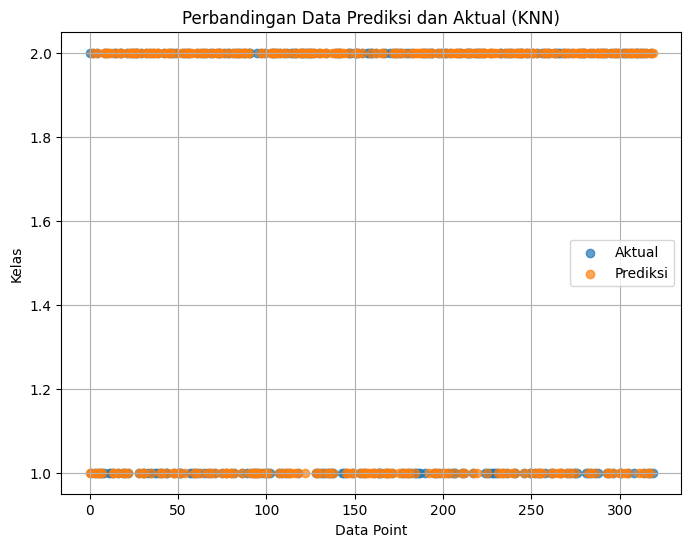

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='Aktual', alpha=0.7)
plt.scatter(range(len(knn_predictions)), knn_predictions, label='Prediksi', alpha=0.7)
plt.xlabel('Data Point')
plt.ylabel('Kelas')
plt.title('Perbandingan Data Prediksi dan Aktual (KNN)')
plt.legend()
plt.grid(True)
plt.show()

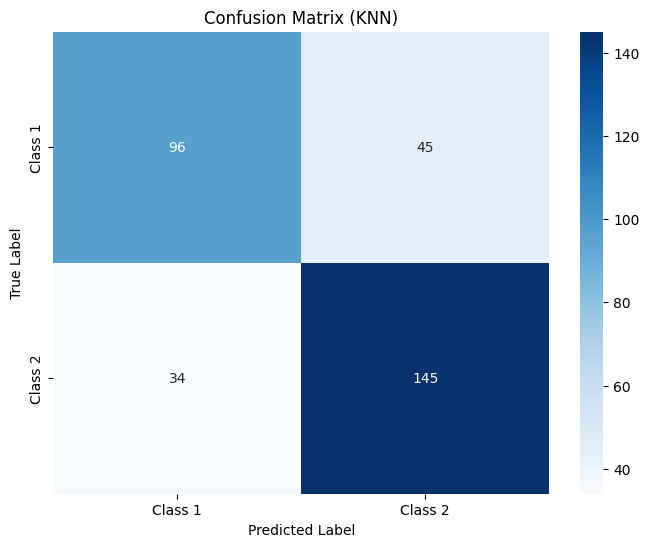

In [ ]:
cm = confusion_matrix(y_test, knn_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 1", "Class 2"],
            yticklabels=["Class 1", "Class 2"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (KNN)")
plt.show()

The KNN model achieved an accuracy of 0.75, or 75%. This means that the model correctly predicted the target class (quality) for 75% of the test data. While an accuracy of 0.75 indicates that the KNN model has a reasonably good potential for predicting red wine quality, further evaluation and model improvement are still necessary to achieve more optimal results.

The model performs better on Class 2, as indicated by the higher recall and F1-score. The lower recall for Class 1 (0.68) suggests that the model tends to miss several samples from this class, resulting in a relatively higher number of false negatives. Overall, the KNN model demonstrates reasonably good and balanced performance, but there is still room for improvement, particularly in identifying Class 1 more accurately.

## Logistic Regression

In [ ]:
# Model Regresi Logistik
logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi model Regresi Logistik
logistic_predictions = logistic_model.predict(X_test_scaled)
print("Akurasi Regresi Logistik:", accuracy_score(y_test, logistic_predictions))
print(classification_report(y_test, logistic_predictions))

Akurasi Regresi Logistik: 0.740625
              precision    recall  f1-score   support

           1       0.69      0.74      0.72       141
           2       0.79      0.74      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



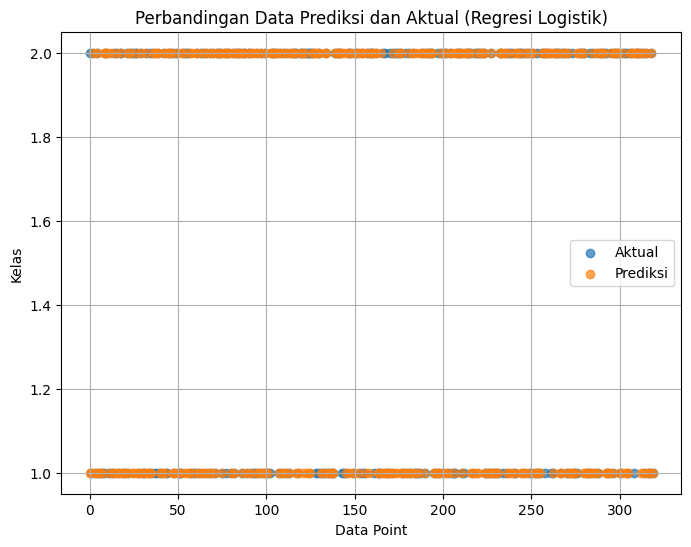

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='Aktual', alpha=0.7)
plt.scatter(range(len(logistic_predictions)), logistic_predictions, label='Prediksi', alpha=0.7)
plt.xlabel('Data Point')
plt.ylabel('Kelas')
plt.title('Perbandingan Data Prediksi dan Aktual (Regresi Logistik)')
plt.legend()
plt.grid(True)
plt.show()

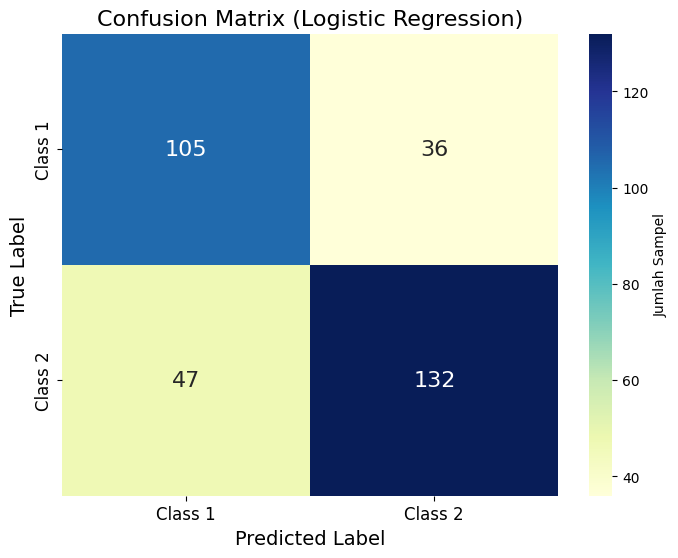

In [ ]:
cm = confusion_matrix(y_test, logistic_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",  # Use a different colormap
            xticklabels=["Class 1", "Class 2"],
            yticklabels=["Class 1", "Class 2"],
            annot_kws={"size": 16},  # Increase font size of annotations
            cbar_kws={'label': 'Jumlah Sampel'}) # Add colorbar label

plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix (Logistic Regression)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The Logistic Regression model achieved an accuracy of 74.06%, which is slightly lower than the KNN model. The model performed better on Class 2, with a higher precision (0.79) and F1-score (0.76), indicating stronger confidence in predictions for this class. Meanwhile, Class 1 had a lower precision (0.69), suggesting a higher number of false positives, although its recall (0.74) is slightly better than that of Class 2. Overall, the model shows balanced performance across classes, but its effectiveness in predicting Class 1 could be further improved.

## Random Forest

In [ ]:
# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Prediksi dan evaluasi model Random Forest
rf_predictions = rf_model.predict(X_test)
print("Akurasi Random Forest:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Akurasi Random Forest: 0.778125
              precision    recall  f1-score   support

           1       0.76      0.73      0.74       141
           2       0.79      0.82      0.80       179

    accuracy                           0.78       320
   macro avg       0.78      0.77      0.77       320
weighted avg       0.78      0.78      0.78       320



The model achieved an accuracy of 77.81%, meaning that approximately 78% of the predictions made by the Random Forest classifier were correct. The model performs slightly better on class 2 compared to class 1, as shown by its higher precision, recall, and F1-score. Overall, the classifier demonstrates good and balanced performance, although there is room for improvement, particularly in better identifying instances of class 1.



# **Best Model**

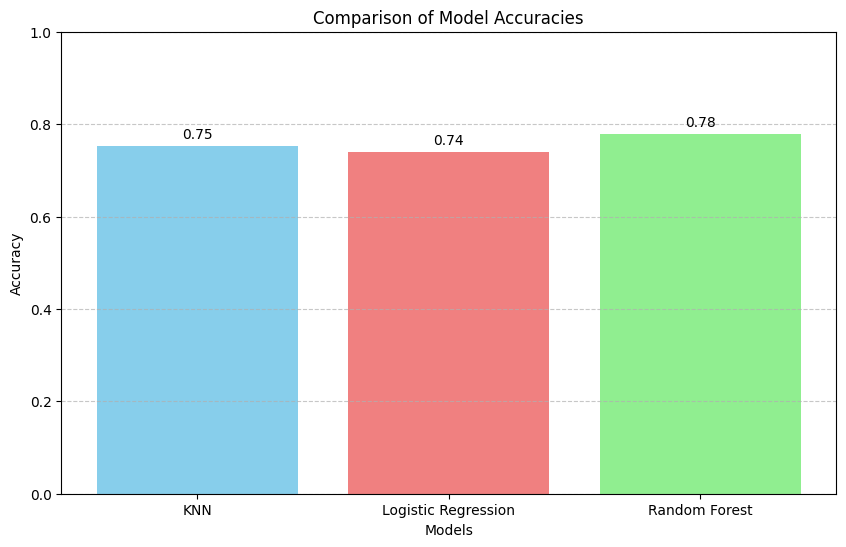

In [ ]:
# Accuracy scores for each model
accuracy_scores = {
    'KNN': accuracy_score(y_test, knn_predictions),
    'Logistic Regression': accuracy_score(y_test, logistic_predictions),
    'Random Forest': accuracy_score(y_test, rf_predictions),
}

models = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=10)


plt.show()

We can observe that the Random Forest model exhibits the highest accuracy among the three, with a score of 0.78. Following closely is the KNN model, which achieves an accuracy of 0.75. Logistic Regression shows the lowest accuracy in this comparison, with a score of 0.74.

In summary, based on this comparison, the Random Forest model appears to be the most accurate for the task at hand, slightly outperforming KNN and showing a modest improvement over Logistic Regression.

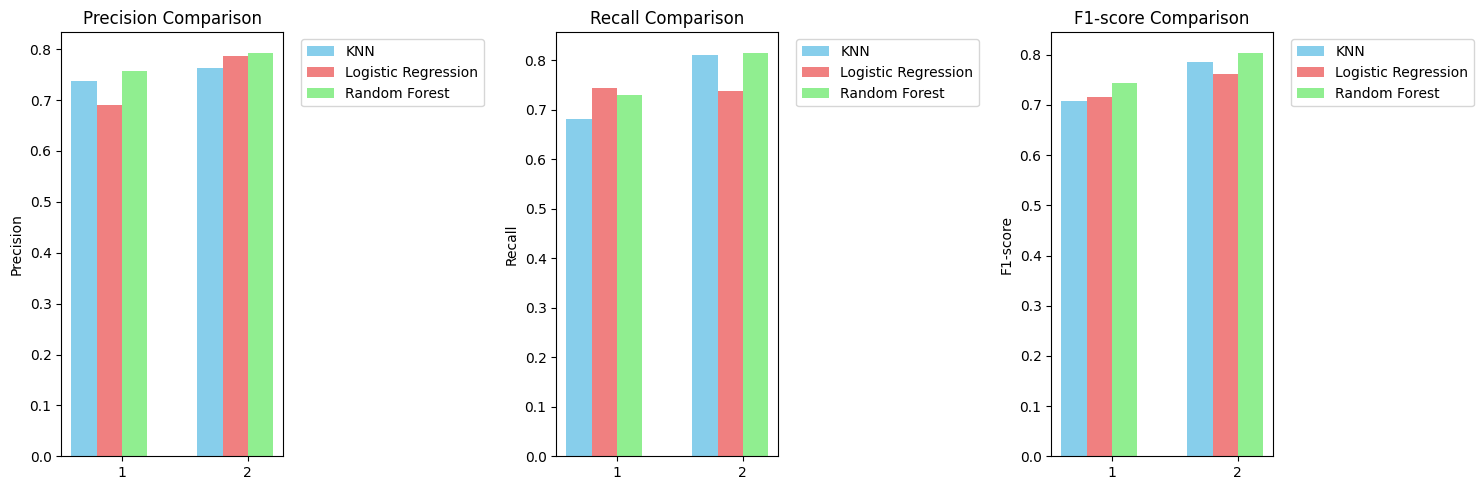

In [ ]:
# Generate classification reports for each model
knn_report = classification_report(y_test, knn_predictions, output_dict=True)
lr_report = classification_report(y_test, logistic_predictions, output_dict=True)
rf_report = classification_report(y_test, rf_predictions, output_dict=True)

# Extract precision, recall, and F1-score for each model and class
models = {
    'KNN': knn_report,
    'Logistic Regression': lr_report,
    'Random Forest': rf_report,
}

metrics = ['precision', 'recall', 'f1-score']
classes = [1,2]  # Assuming you have classes 1 and 2

# Create the plot
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))

colors = ['skyblue', 'lightcoral', 'lightgreen']  # Colors for the models

for i, metric in enumerate(metrics):
    for j, (model_name, report) in enumerate(models.items()):
      values = [report[str(cls)][metric] for cls in classes]
      axes[i].bar(np.arange(len(classes)) + j * 0.2, values, width=0.2, label=model_name, color=colors[j])

    axes[i].set_xticks(np.arange(len(classes)) + 0.3)
    axes[i].set_xticklabels(classes)
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_title(metric.capitalize() + ' Comparison')
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

Based on the analysis results, the Random Forest model proves to be the best choice due to its highest accuracy of 0.78, as well as its consistently superior performance in other evaluation metrics, such as Precision, Recall, and F1-score, compared to the other models. The KNN and Logistic Regression models perform lower than Random Forest, making them less recommended for the given case.